# Welcome to our Analysis of Hotel Reservations

In [1]:
# Let's start by importing any necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import packages for cleaning and organizing data
from sklearn.model_selection import cross_val_score, train_test_split
# import model packages
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
# import need metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, f1_score
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.decomposition import PCA

# Step 1
Load, clean, assess, and organize the data in preperation for further analysis

In [2]:
# Now lets load the data 
hotelDF = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv')

# here is the url to look at the data explanation
# https://github.com/rfordatascience/tidytuesday/tree/master/data/2020/2020-02-11

In [3]:
print(hotelDF.columns)
hotelDF.head()

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [30]:
hotelDF.shape

(119390, 32)

In [4]:
# What are some possible opportunities for feature engineering with our data

In [5]:
# is the reserved room type the same as the assigned room type?


In [6]:
# Now that we have our data, lets go ahead and do some exploratory analysis

In [7]:
# mean and standard deviation for all numeric variables
myColumn = 'required_car_parking_spaces'
print(round(hotelDF[myColumn].mean(), 2))
round(hotelDF[myColumn].std(), 2)

0.06


0.25

In [8]:
# identifying value counts for non-numeric variables
myColumn = 'reservation_status'
hotelDF[myColumn].value_counts().head(15)

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [14]:
myColumn = 'reservation_status'
hotelDF[myColumn].value_counts().head(15) / len(hotelDF.index)

Check-Out    0.629584
Canceled     0.360307
No-Show      0.010110
Name: reservation_status, dtype: float64

In [15]:
hotelDF['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [16]:
hotelDF['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [17]:
hotelDF['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [18]:
# choose columns that I want to use
myDF= hotelDF[['hotel', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type','days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status']]

In [19]:
myDF.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,342,2015,July,27,1,0,0,2,0.0,...,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,737,2015,July,27,1,0,0,2,0.0,...,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,7,2015,July,27,1,0,1,1,0.0,...,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,13,2015,July,27,1,0,1,1,0.0,...,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,14,2015,July,27,1,0,2,2,0.0,...,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out


In [20]:
# remove NA values
print(len(myDF.index))
myDF.dropna(axis=0, inplace = True)
print(len(myDF.index))

119390
118898


C:\Users\jhdeg\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
# turn my target column into its own DF
myY = myDF['reservation_status']
myY.head()

0    Check-Out
1    Check-Out
2    Check-Out
3    Check-Out
4    Check-Out
Name: reservation_status, dtype: object

In [22]:
# hot-shot columns -- get dummy variables for:
# hotel
# arrival_date_month
# reserved_room_type 
# assigned_room_type
# deposit_type
# customer_type

myX = myDF.drop(['reservation_status'], axis = 1)
myX = pd.get_dummies(myX, drop_first=True)
myX.head()



,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,342,2015,27,1,0,0,2,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,737,2015,27,1,0,0,2,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,7,2015,27,1,0,1,1,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,13,2015,27,1,0,1,1,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,14,2015,27,1,0,2,2,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
myYs=myY.unique().tolist()
print(myYs)
imputer = np.vectorize(lambda x: myYs.index(x))
myYNs = imputer(myY)
print(myYNs)
print(set(myYNs))

['Check-Out', 'Canceled', 'No-Show']
[0 0 0 ... 0 0 0]
{0, 1, 2}


In [24]:
# split into train test split
X_train, X_test, y_train, y_test = train_test_split(myX, myY, stratify=myY, test_size = 0.25, random_state=801)

# Step 2
Try using several models to figure out which one works best

In [27]:
# Logistic Regression
X_train.shape

(89173, 244)

In [20]:
#Using PCA because it isn't converging
#lr1 = Pipeline([("scale",StandardScaler()),("pca",PCA(0.9)),("scale2",StandardScaler()),
#                ("log",LogisticRegression(penalty="elasticnet",solver="saga",l1_ratio=0.5,random_state=569,max_iter=1000))])
#lr1.fit(X_train,y_train)
#
#y_hat_lr1 = lr1.predict(X_test)
#print(metrics.classification_report(y_test, y_hat_lr1))
#Note: still not converging; skip (at least for now)

In [39]:
# KNN

In [ ]:
kn1 = Pipeline([("scale",StandardScaler()),("knn",KNeighborsClassifier())])
kn1.fit(X_train,y_train)

y_hat_kn1 = kn1.predict(X_test)
print(metrics.classification_report(y_test, y_hat_kn1))

In [ ]:
#Used PCA to remove unnecessary columns, greatly reducing their number
kn2 = Pipeline([("pca",PCA(0.99)),("poly",PolynomialFeatures(interaction_only=True)),("scale",StandardScaler()),("knn",KNeighborsClassifier())])
kn2.fit(X_train,y_train)

y_hat_kn2 = kn2.predict(X_test)
print(metrics.classification_report(y_test, y_hat_kn2))

In [ ]:
# Decision Trees

In [56]:
dt1 = DecisionTreeClassifier()
dt1.fit(X_train,y_train)

y_hat_dt1 = dt1.predict(X_test)
print(metrics.classification_report(y_test, y_hat_dt1))

              precision    recall  f1-score   support

    Canceled       0.79      0.80      0.80     10738
   Check-Out       0.88      0.88      0.88     18686
     No-Show       0.29      0.26      0.27       301

    accuracy                           0.84     29725
   macro avg       0.65      0.64      0.65     29725
weighted avg       0.84      0.84      0.84     29725



In [58]:
dt3 = DecisionTreeClassifier(min_samples_leaf=3)
dt3.fit(X_train,y_train)

y_hat_dt3 = dt3.predict(X_test)
print(metrics.classification_report(y_test, y_hat_dt3))

              precision    recall  f1-score   support

    Canceled       0.79      0.80      0.79     10738
   Check-Out       0.88      0.88      0.88     18686
     No-Show       0.41      0.19      0.26       301

    accuracy                           0.84     29725
   macro avg       0.69      0.62      0.64     29725
weighted avg       0.84      0.84      0.84     29725



In [ ]:
# Multinomal naive bayes

In [59]:
nb1 = MultinomialNB()
nb1.fit(X_train,y_train)

y_hat_nb1 = nb1.predict(X_test)
print(metrics.classification_report(y_test, y_hat_nb1))

              precision    recall  f1-score   support

    Canceled       0.52      0.52      0.52     10738
   Check-Out       0.65      0.20      0.30     18686
     No-Show       0.01      0.65      0.03       301

    accuracy                           0.32     29725
   macro avg       0.40      0.46      0.28     29725
weighted avg       0.60      0.32      0.38     29725



In [65]:
#PCA to reduce column number, minmaxscaler to make all values positive (MultinomialNB cannot accept negative inputs)
nb2 = Pipeline([("pca",PCA(0.99)),("scale",MinMaxScaler()),("poly",PolynomialFeatures()),("nb",MultinomialNB())])
nb2.fit(X_train,y_train)

y_hat_nb2 = nb2.predict(X_test)
print(metrics.classification_report(y_test, y_hat_nb2,zero_division=0))

              precision    recall  f1-score   support

    Canceled       0.00      0.00      0.00     10738
   Check-Out       0.63      1.00      0.77     18686
     No-Show       0.00      0.00      0.00       301

    accuracy                           0.63     29725
   macro avg       0.21      0.33      0.26     29725
weighted avg       0.40      0.63      0.49     29725



In [ ]:
# Random Forest

In [25]:
rf1 = RandomForestClassifier(random_state=2457)
rf1.fit(X_train,y_train)

y_hat_rf1 = rf1.predict(X_test)
print(metrics.classification_report(y_test, y_hat_rf1))

              precision    recall  f1-score   support

    Canceled       0.89      0.81      0.84     10738
   Check-Out       0.89      0.94      0.91     18686
     No-Show       0.90      0.23      0.37       301

    accuracy                           0.89     29725
   macro avg       0.89      0.66      0.71     29725
weighted avg       0.89      0.89      0.88     29725



In [28]:
confusion_matrix(y_test, y_hat_rf1)

array([[ 8662,  2075,     1],
       [ 1073, 17606,     7],
       [   41,   190,    70]], dtype=int64)

In [29]:
y_test.value_counts()

Check-Out    18686
Canceled     10738
No-Show        301
Name: reservation_status, dtype: int64

In [71]:
rf2 = Pipeline([("pca",PCA(0.99)),("poly",PolynomialFeatures()),("rf",RandomForestClassifier(random_state=2457))])
rf2.fit(X_train,y_train)

y_hat_rf2 = rf2.predict(X_test)
print(metrics.classification_report(y_test, y_hat_rf2))

              precision    recall  f1-score   support

    Canceled       0.79      0.66      0.72     10738
   Check-Out       0.81      0.90      0.85     18686
     No-Show       0.62      0.22      0.33       301

    accuracy                           0.80     29725
   macro avg       0.74      0.59      0.63     29725
weighted avg       0.80      0.80      0.80     29725



# Step 3
Identify which variables were most influential in people cancelling or not showing up for their reservation

In [49]:
# make new random forest model using all of our data
rf3 = RandomForestClassifier(random_state=2457)
rf3.fit(myX,myY)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2457,
                       verbose=0, warm_start=False)

In [39]:
# feature_importances_
importance = rf3.feature_importances_


In [41]:
forest_importances = pd.Series(importance, index=X_train.columns)

forest_importances.head()


lead_time                    0.118190
arrival_date_year            0.023901
arrival_date_week_number     0.048694
arrival_date_day_of_month    0.055397
stays_in_weekend_nights      0.025609
dtype: float64

In [46]:
top15 = forest_importances.sort_values(ascending=False).head(15)
top15

lead_time                      0.118190
deposit_type_Non Refund        0.078876
adr                            0.077802
country_PRT                    0.072746
total_of_special_requests      0.058870
arrival_date_day_of_month      0.055397
arrival_date_week_number       0.048694
stays_in_week_nights           0.039059
previous_cancellations         0.029752
stays_in_weekend_nights        0.025609
arrival_date_year              0.023901
booking_changes                0.021931
market_segment_Online TA       0.020575
required_car_parking_spaces    0.019986
market_segment_Groups          0.019337
dtype: float64

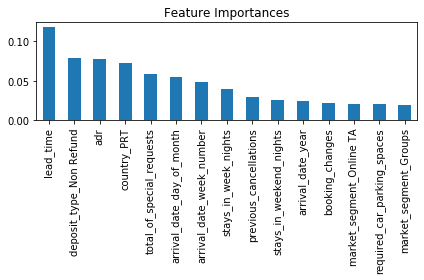

In [48]:
fig, ax = plt.subplots()
top15.plot.bar(ax=ax)
ax.set_title("Feature Importances")
fig.tight_layout()